# This skripts uses the Emotion Classfier to enrich the truths dataset

In [1]:
import pandas as pd
import torch
TEST_FLAG = False
if TEST_FLAG:
    NUM_TRUTHS = 2000
OUTPUT_PATH = "../../Data/ProcessedData/enriched_comments_emotions.tsv"
DEVICE = torch.device("cuda") # Force CPU for testing, change to "cuda" if GPU is available
TEMP_DIR = "./temp_progress"
TEMP_PATH = TEMP_DIR + "/progress.csv"
truths_path = "../../Data/ProcessedData/truths_cleaned.tsv"
df_truths = pd.read_csv(truths_path, sep="\t")
print(df_truths.head())

       id            timestamp                time_scraped is_retruth  \
0  703265  2022-05-14 00:00:00  2022-11-01 15:48:16.829245          t   
1  807614  2022-03-27 00:00:00  2022-11-23 10:54:36.865046          t   
2  807615  2022-03-29 00:00:00  2022-11-23 10:55:11.613249          t   
3  807618  2022-03-29 00:00:00  2022-11-23 10:56:29.134825          t   
4  807619  2022-03-29 00:00:00  2022-11-23 10:57:20.028953          f   

  is_reply  author  like_count  retruth_count  reply_count  \
0        f    2247           0              0            0   
1        f   20054           0              0            0   
2        f   20054           0              0            0   
3        f   20054           0              0            0   
4        t   20054           0              0            0   

                                                text         external_id  \
0  Q+ BE READY ANONS - PUBLIC AWAKENING COMING - ...  108351978111014587   
1                          Enough is

In [2]:
truths_path = "../../Data/ProcessedData/truths_cleaned.tsv"
df_truths = pd.read_csv(truths_path, sep="\t")
print(df_truths.head())

       id            timestamp                time_scraped is_retruth  \
0  703265  2022-05-14 00:00:00  2022-11-01 15:48:16.829245          t   
1  807614  2022-03-27 00:00:00  2022-11-23 10:54:36.865046          t   
2  807615  2022-03-29 00:00:00  2022-11-23 10:55:11.613249          t   
3  807618  2022-03-29 00:00:00  2022-11-23 10:56:29.134825          t   
4  807619  2022-03-29 00:00:00  2022-11-23 10:57:20.028953          f   

  is_reply  author  like_count  retruth_count  reply_count  \
0        f    2247           0              0            0   
1        f   20054           0              0            0   
2        f   20054           0              0            0   
3        f   20054           0              0            0   
4        t   20054           0              0            0   

                                                text         external_id  \
0  Q+ BE READY ANONS - PUBLIC AWAKENING COMING - ...  108351978111014587   
1                          Enough is

In [3]:
comments= df_truths["text"].tolist()

if TEST_FLAG:
    comments = comments[:NUM_TRUTHS]
print(comments[0])

Q+ BE READY ANONS - PUBLIC AWAKENING COMING - Q <emoji: popcorn><emoji: frog><emoji: us> #RETruth


In [ ]:
from CommentClassifier.EmotionCommentClassifierLLM import EmotionCommentClassifierLLM

classifier = EmotionCommentClassifierLLM(comments,device=DEVICE)
for comment in comments[:10]:
    print(f"comment: {comment},\n classification: {classifier.classify_one(comment)}\n\n" )


comment: Q+ BE READY ANONS - PUBLIC AWAKENING COMING - Q <emoji: popcorn><emoji: frog><emoji: us> #RETruth,
 classification: neutral


comment: Enough is enough! RETRUTH,
 classification: anger


comment: https://justthenews.com/politics-policy/all-things-trump/trump-calls-putin-release-info-hunter-bidens-dealings-oligarchs,
 classification: neutral


comment: https://t.me/realx22report/6729,
 classification: neutral


comment: @CeceBloomwood,
 classification: neutral


comment: Joe Biden wants this video removed from the internet. I say we up the game and share it all over,
 classification: neutral


comment: <emoji: dart><emoji: 100><emoji: us>,
 classification: neutral


comment: https://t.me/realx22report/6692,
 classification: neutral


comment: #truth #soros #ukraine,
 classification: fear


comment: WHAT A GLORIOUS DAY THAT WILL BE<emoji: heart_decoration><emoji: latin_cross>,
 classification: joy




In [ ]:
labels, label_logits = classifier.classify(output_file=TEMP_PATH, batch_size=256, steps_to_save=1000) 
print(labels[:5])
print(label_logits[:5])

Recovered progress: starting at index 177664/762028


  0%|          | 0/2283 [00:00<?, ?it/s]

Saved progress at index 192000/762028
Saved progress at index 224000/762028
Saved progress at index 256000/762028
Saved progress at index 288000/762028
Saved progress at index 320000/762028
Saved progress at index 352000/762028
Saved progress at index 384000/762028
Saved progress at index 416000/762028
Saved progress at index 448000/762028
Saved progress at index 480000/762028
Saved progress at index 512000/762028
Saved progress at index 544000/762028
Saved progress at index 576000/762028
Saved progress at index 608000/762028
Saved progress at index 640000/762028
Saved progress at index 672000/762028
Saved progress at index 704000/762028
Saved progress at index 736000/762028
Saved progress at index 762028/762028
['neutral', 'anger', 'neutral', 'neutral', 'neutral']
[tensor([ 0.2946, -3.2339,  1.4574,  0.7057,  2.4656, -1.4992,  0.5595]), tensor([ 3.4363,  0.1696, -0.8708, -2.0323,  1.7057, -0.8134, -0.9682]), tensor([ 0.9864, -3.9381,  0.8691,  0.3574,  1.8072,  0.7952,  0.2165]), tens

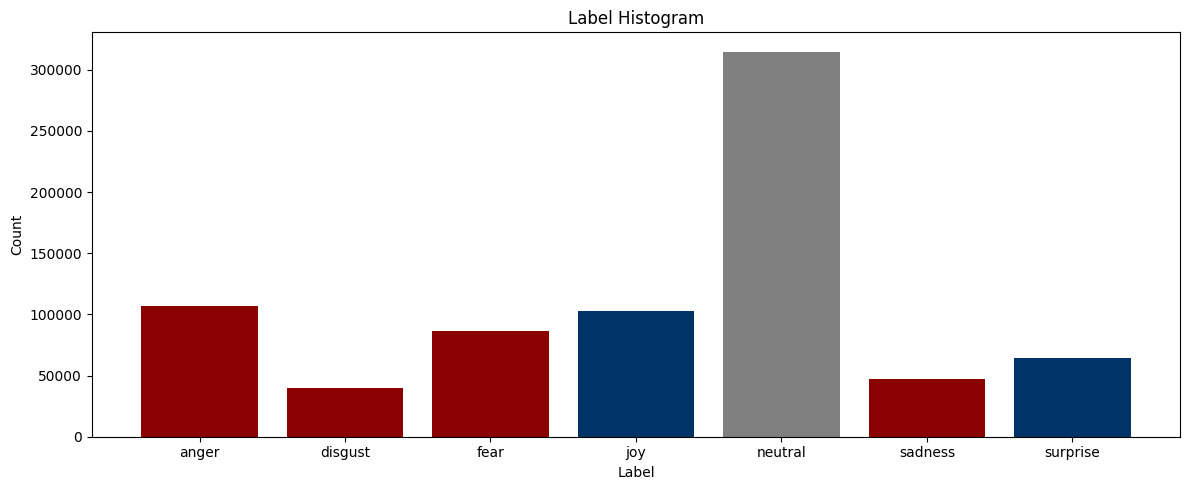

In [4]:
import matplotlib.pyplot as plt



negative_labels = {"anger", "disgust", "fear", "sadness"}
positive_labels = {"joy", "surprise"}
NEG_COLOR = "#8B0000"   # dark red
POS_COLOR = "#003366"   # dark blue
NEU_COLOR = "#808080"   # gray for neutral

df_classified = pd.read_csv(TEMP_PATH)

counts = df_classified["label"].value_counts().sort_index()

colors = [
    NEG_COLOR if label in negative_labels
    else POS_COLOR if label in positive_labels
    else NEU_COLOR
    for label in counts.index
]

plt.figure(figsize=(12, 5))
plt.bar(counts.index, counts.values, color=colors)
plt.title("Label Histogram")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
import random

#example for each label
labels = classifier.labels
for label in labels:
    print(f"{label.upper()}\n")
    examples = df_classified.loc[df_classified["label"] == label, "text"].tolist()
    random.shuffle(examples)
    for i, e in enumerate(examples[:10]):
        print(f"example {i} : {e}\n")

ANGER

example 0 : We refuse to have an intellectual debate with an unarmed idiot. Just because you can dream up BS only pollutes the air with your insignificance. Troll.

example 1 : YOUR FIRED!

example 2 : Amen to this!

example 3 : PAUL: 'The left-wing media loves going after Republicans, but when it’s Nancy Pelosi, ''Oh, that’s not really close contact.'' Well, that’s ridiculous. Nobody in America [who] sees … her kissing Biden on the cheek … would understand that not to be close contact.'" https://hannity.com/media-room/rand-slam-watch-rand-paul-destroy-democrat-double-standards-on-covid-19/"

example 4 : How could there EVER be any justification for this?<emoji: rage><emoji: face_with_symbols_on_mouth>￼

example 5 : Ukraine Nazis are very much like American Nazis. They both accuse their opponents of doing what they just did. Nazis....Marxists.....Commies. They are all the same now.

example 6 : Tucked him into bed. #mypillow

example 7 : Gorsuch, Kavanaugh and Barrett didn’t “li

In [ ]:
print(df_classified.head())

   index                                               text    label  \
0      0  Q+ BE READY ANONS - PUBLIC AWAKENING COMING - ...  neutral   
1      1                          Enough is enough! RETRUTH    anger   
2      2  https://justthenews.com/politics-policy/all-th...  neutral   
3      3                    https://t.me/realx22report/6729  neutral   
4      4                                     @CeceBloomwood  neutral   

     logit1    logit2    logit3    logit4    logit5    logit6    logit7  
0  0.294558 -3.233876  1.457426  0.705682  2.465552 -1.499218  0.559450  
1  3.436345  0.169559 -0.870805 -2.032342  1.705664 -0.813364 -0.968161  
2  0.986426 -3.938139  0.869131  0.357403  1.807199  0.795242  0.216474  
3 -1.575292 -2.730403 -2.135876  0.389355  4.144863  0.329490  2.108639  
4 -1.275166 -3.528342 -1.935976  0.768528  3.841754  1.080108  1.860525  


In [ ]:
if not TEST_FLAG:
    df_truths["emotion_label"] = df_classified["label"]
    df_truths["emotion_label_logits"] = [df_classified["label1"],df_classified["label2"],df_classified["label3"],df_classified["label4"],df_classified["label5"],df_classified["label6"],df_classified["label7"]] 
    df_truths.to_csv(OUTPUT_PATH, sep="\t", index=False)

KeyError: 'label_logits'